<h2><center> Welcome to the Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

**Work done By:**

**Group Name:** *brotherhood*

**Team Leader:** *NIYOKWIZERA JEAN D AMOUR*

**Contact:** *+250784422138*

[Email](niyokwizerajd123@gmail.com)

**Team Member:** *
BYUKUSENGE Sandrine*

[Email](sandrinebyukusenge99@gmail.com)

**Contact:** *Byukusenge Sandrine*







[github source code](https://github.com/jeid12/IndabaX_2024-elegalcryptocurency-)


**Created** *21-06-2024*

   **Finished** *22-06-2024*



<a name="Libraries"></a>
## 1. Importing Libraries


In [74]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing the required dependency**

In [75]:
!pip install scikit-learn
!pip install catboost -qq




In [76]:
!pip install lightgbm

In [77]:
SEED = 1221
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold




<a name="Data"></a>
## 2. Loading Data

In [78]:
# Load files
train = pd.read_csv('/content/drive/MyDrive/indabax-rwanda-2024-hacktathon20240614-2435-ccan8g/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/indabax-rwanda-2024-hacktathon20240614-2435-ccan8g/Test.csv')
ss = pd.read_csv('/content/drive/MyDrive/indabax-rwanda-2024-hacktathon20240614-2435-ccan8g/SampleSubmission.csv')

# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [79]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [80]:
# Preview sample submission file
ss.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,0
4,ID_8CRTF1BJOD,0


In [45]:
train.Label.value_counts()

Label
0    6504
1    2404
Name: count, dtype: int64

In [81]:
# Check size and shape of datasets
train.shape, test.shape, ss.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [82]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [83]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [49]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

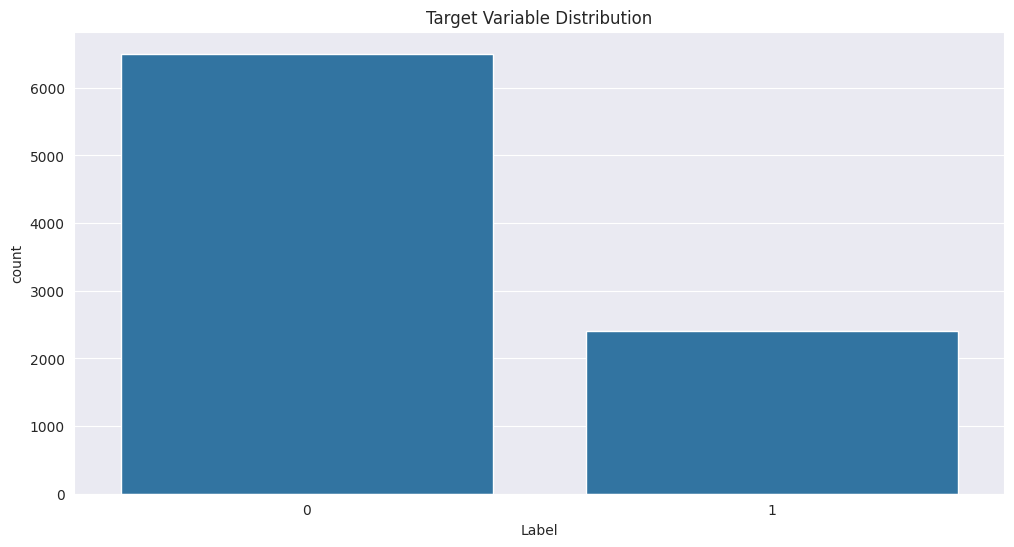

In [84]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

There is a class imbalance in our dataset

**Plotting a heatmap to show correlations between variables**

*Ploted correctly*

 corr = train.corr() plt.figure(figsize = (15, 12)) sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0) plt.title('Correlogram', fontsize = 15, color = 'darkgreen') plt.show()

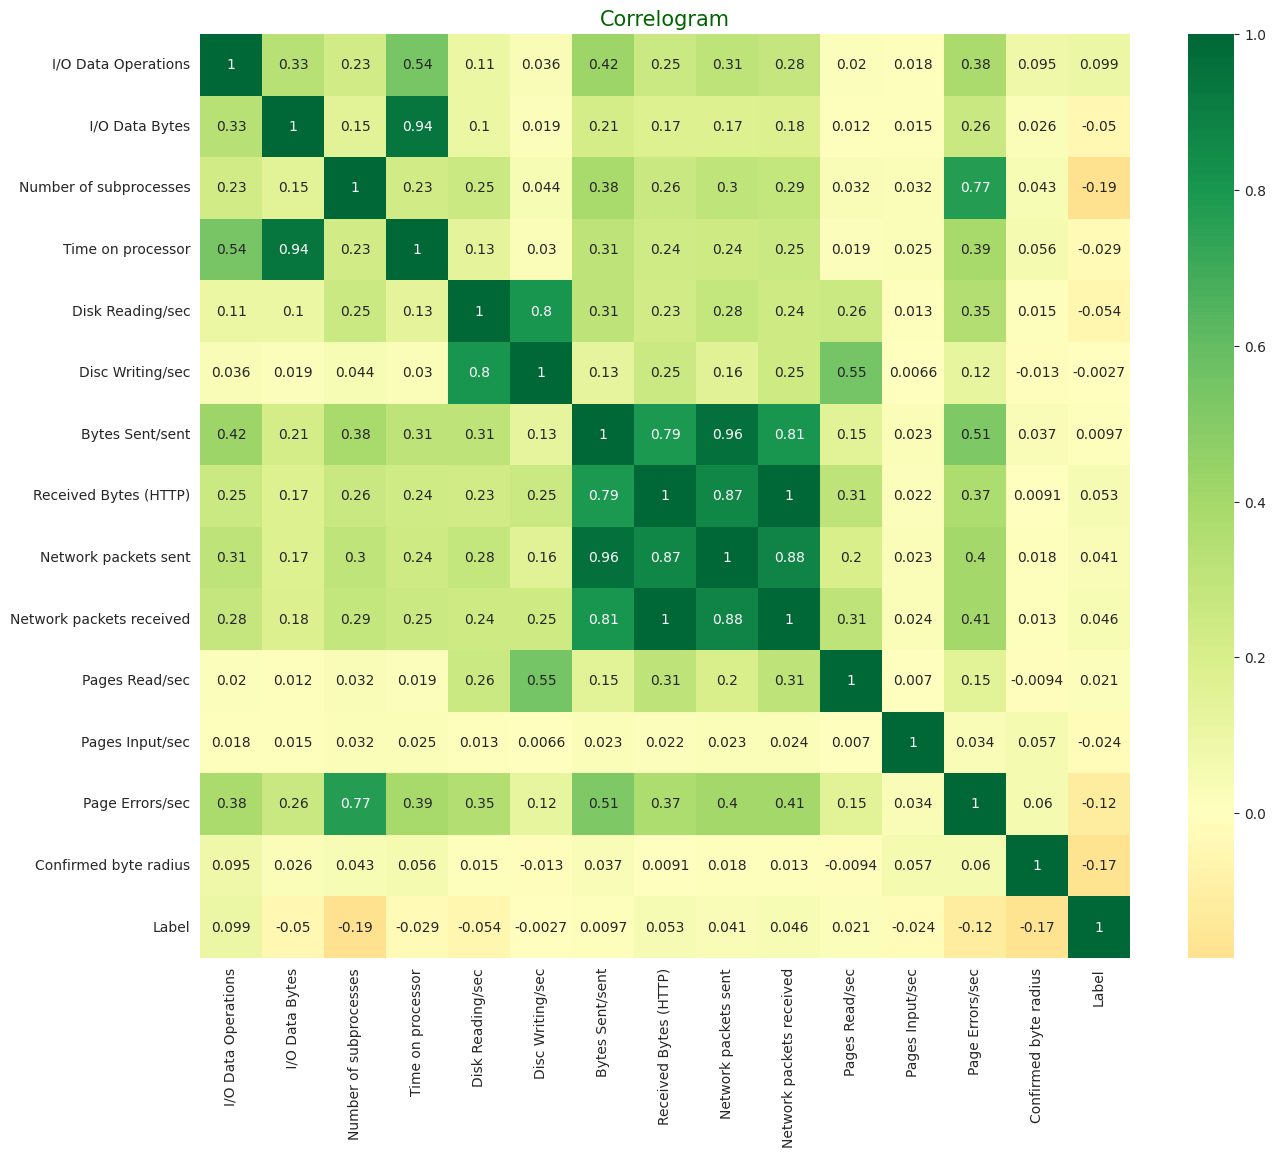

In [85]:
numeric_cols = train.select_dtypes(include=np.number)
corr = numeric_cols.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot=True, center=0)
plt.title('Correlogram', fontsize=15, color='darkgreen')
plt.show()

Most features are not strongly correlated with the target

**6.Modeling**

In [86]:
target = train.Label
train = train.drop("Label", axis = 1)

In [87]:


# Assuming train and test are DataFrames you want to concatenate
data = pd.concat([train, test], ignore_index=True)

In [88]:
data.isnull().sum()

ID                          0
I/O Data Operations         0
 I/O Data Bytes             0
Number of subprocesses      0
Time on processor           0
Disk Reading/sec            0
Disc Writing/sec            0
Bytes Sent/sent             0
Received Bytes (HTTP)       0
Network packets sent        0
Network packets received    0
Pages Read/sec              0
Pages Input/sec             0
Page Errors/sec             0
Confirmed byte radius       0
dtype: int64

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12726 entries, 0 to 12725
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        12726 non-null  object 
 1   I/O Data Operations       12726 non-null  float64
 2    I/O Data Bytes           12726 non-null  float64
 3   Number of subprocesses    12726 non-null  float64
 4   Time on processor         12726 non-null  float64
 5   Disk Reading/sec          12726 non-null  float64
 6   Disc Writing/sec          12726 non-null  float64
 7   Bytes Sent/sent           12726 non-null  float64
 8   Received Bytes (HTTP)     12726 non-null  float64
 9   Network packets sent      12726 non-null  float64
 10  Network packets received  12726 non-null  float64
 11  Pages Read/sec            12726 non-null  float64
 12  Pages Input/sec           12726 non-null  float64
 13  Page Errors/sec           12726 non-null  float64
 14  Confir

In [90]:
data[data['Time on processor']>15]#head(15)

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
844,ID_ILIEQ8CM13,842.324898,3.620080e+06,47.0,16.494205,40.958387,5.644835,3109.014930,81736.22829,19.334670,63.137698,0.844503,0.0,22449.46307,30.862612
1070,ID_WTOVNJX1KD,871.762351,4.123454e+06,47.0,15.977698,30.877927,7.958458,10642.614390,410547.91500,100.258784,293.418112,0.978134,0.0,21740.01684,34.242759
1968,ID_E2PDAB714I,1795.316255,3.951748e+06,44.0,25.246148,35.340267,15.192807,19144.186550,353321.66340,113.957015,288.794874,1.205778,0.0,56769.88579,46.658146
7111,ID_AAPDZ89GVA,1231.030581,5.410029e+05,32.0,18.086928,17.813607,2.477240,7524.098184,625029.06250,56.436029,429.193070,0.112602,0.0,98031.40863,46.784800
7450,ID_RBYXUVPMHN,1469.029821,3.425338e+06,37.0,16.072385,14.193525,3.408838,4364.369344,85956.74393,27.948486,70.548995,1.176149,0.0,17568.59354,25.003165


In [91]:
# Define the ranking function
def rank_4_3_2_1(x):
    # Remove outliers using 3 standard deviations rule
    no_outliers = x[(x - x.mean()).abs() <= 3 * x.std()]
    q1 = no_outliers.quantile(0.25)
    q2 = no_outliers.quantile(0.5)
    q3 = no_outliers.quantile(0.75)
    ranks = pd.Series(index=x.index)
    ranks[x >= q3] = 2
    ranks[(x >= q2) & (x < q3)] = 3
    ranks[(x >= q1) & (x < q2)] = 4
    ranks[x < q1] = 1
    return ranks

# Get a list of the column names
columns = data.drop("ID", axis=1).columns.tolist()

to_remove=[]
# Iterate over each column, rank the values, and add the result to a new column
for col in columns:
    ranks = rank_4_3_2_1(data[col])
    data[f"{col}_rank"] = ranks
    to_remove.append(f"{col}_rank")

# Calculate the sum of the ranks for each column
rank_sums = data.filter(regex="_rank$").sum(axis=1)

# Add the rank sums as a new row to the DataFrame
data["Rank Sum"] = rank_sums
data = data.drop(to_remove, axis=1)

data

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Rank Sum
0,ID_4W8AP96UO6,114.798900,3.790451e+03,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,42.0
1,ID_UD3TM0ZYND,14.154240,5.182452e+03,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,42.0
2,ID_XAG1HC0HWM,0.044444,1.208213e+02,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,30.0
3,ID_CEXD05IR09,31.369916,1.272283e+05,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,29.0
4,ID_X6E97FT8IF,5.046181,1.091620e+03,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12721,ID_PAWIH292SB,7.290908,3.276107e+03,27.0,0.034732,0.755765,0.000000,66.596217,60.416728,0.955820,0.866907,0.000000,0.0,332.647660,28.937109,45.0
12722,ID_EMPXLFEHRN,12.336515,2.539813e+04,42.0,1.528201,17.115526,1.244766,1401.005811,17492.334080,8.535535,17.737909,0.955802,0.0,15087.869440,28.098248,32.0
12723,ID_437MU86JLQ,4.754111,1.123303e+03,30.0,0.000000,1.932746,0.000000,48.518591,28.702390,0.533171,0.377663,0.044431,0.0,370.087546,31.630495,47.0
12724,ID_TMGB3DFDLX,271.668446,3.287590e+06,33.0,9.429024,11.242224,1.720977,2277.276675,107508.960100,18.371984,81.623461,0.245854,0.0,8097.574777,27.496611,30.0


In [92]:
data["Speed of Operations to Speed of Data Bytes"] = data["I/O Data Operations"]/data[" I/O Data Bytes"]
data["Time for a single Process"] = data["Time on processor"]/data["Number of subprocesses"]


data["Ratio of data flow"] = data["Received Bytes (HTTP)"]/data["Bytes Sent/sent"]
data["Ratio of Packet flow"] = data["Network packets received"]/data["Network packets sent"]


data["Total Page Errors"] = data["Time on processor"] * data["Page Errors/sec"]
#data["Read to write comparision"] = data["Disk Reading/sec"]/ data["Disc Writing/sec"]


# Create the Network Usage feature
data["Network Usage"] = data["Bytes Sent/sent"] + data["Received Bytes (HTTP)"]


# Create the Network Activity Rate feature
data["Network Activity Rate"] = data["Network packets sent"] + data["Network packets received"]

# Create the Page Fault Rate feature
data["Page Fault Rate"] = (data["Pages Read/sec"] + data["Pages Input/sec"]) / data["Page Errors/sec"]

# Create the Network Latency feature
data["Network Latency"] = data["Network packets sent"] - data["Network packets received"]

# Create the Disk Latency feature
data["Disk Latency"] = (data["Disk Reading/sec"] + data["Disc Writing/sec"]) / data["I/O Data Operations"]

In [93]:
data = data.drop(["Disc Writing/sec","Pages Input/sec"], axis=1)

In [94]:
data['Time on processor'].describe()

count    12726.000000
mean         0.488521
std          1.551592
min          0.000000
25%          0.000000
50%          0.034734
75%          0.451386
max         25.246148
Name: Time on processor, dtype: float64

In [95]:
train.shape, test.shape

((8908, 15), (3818, 15))

In [96]:
data = data.drop(["ID"], axis=1)

In [97]:
train=data.iloc[:train.shape[0],]
test= data.iloc[train.shape[0]:,]
y = target

In [98]:



predictions = []
scores = []
i=0

params = {'learning_rate': 0.185243125886494,
          'subsample': 0.2128564969905326,
          'colsample_bytree': 0.5046224462041669,
          'max_depth': 13,
          'scale_pos_weight': 4,
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(train,y):
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier2 = LGBMClassifier(**params)
    classifier2.fit(X_train, Y_train)
    preds=classifier2.predict(X_test)
    score = f1_score(Y_test,preds)
    scores.append(score)
    print("F1: ", score)
    predictions.append(classifier2.predict(test))
    i=i+1


print(np.mean(scores))


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

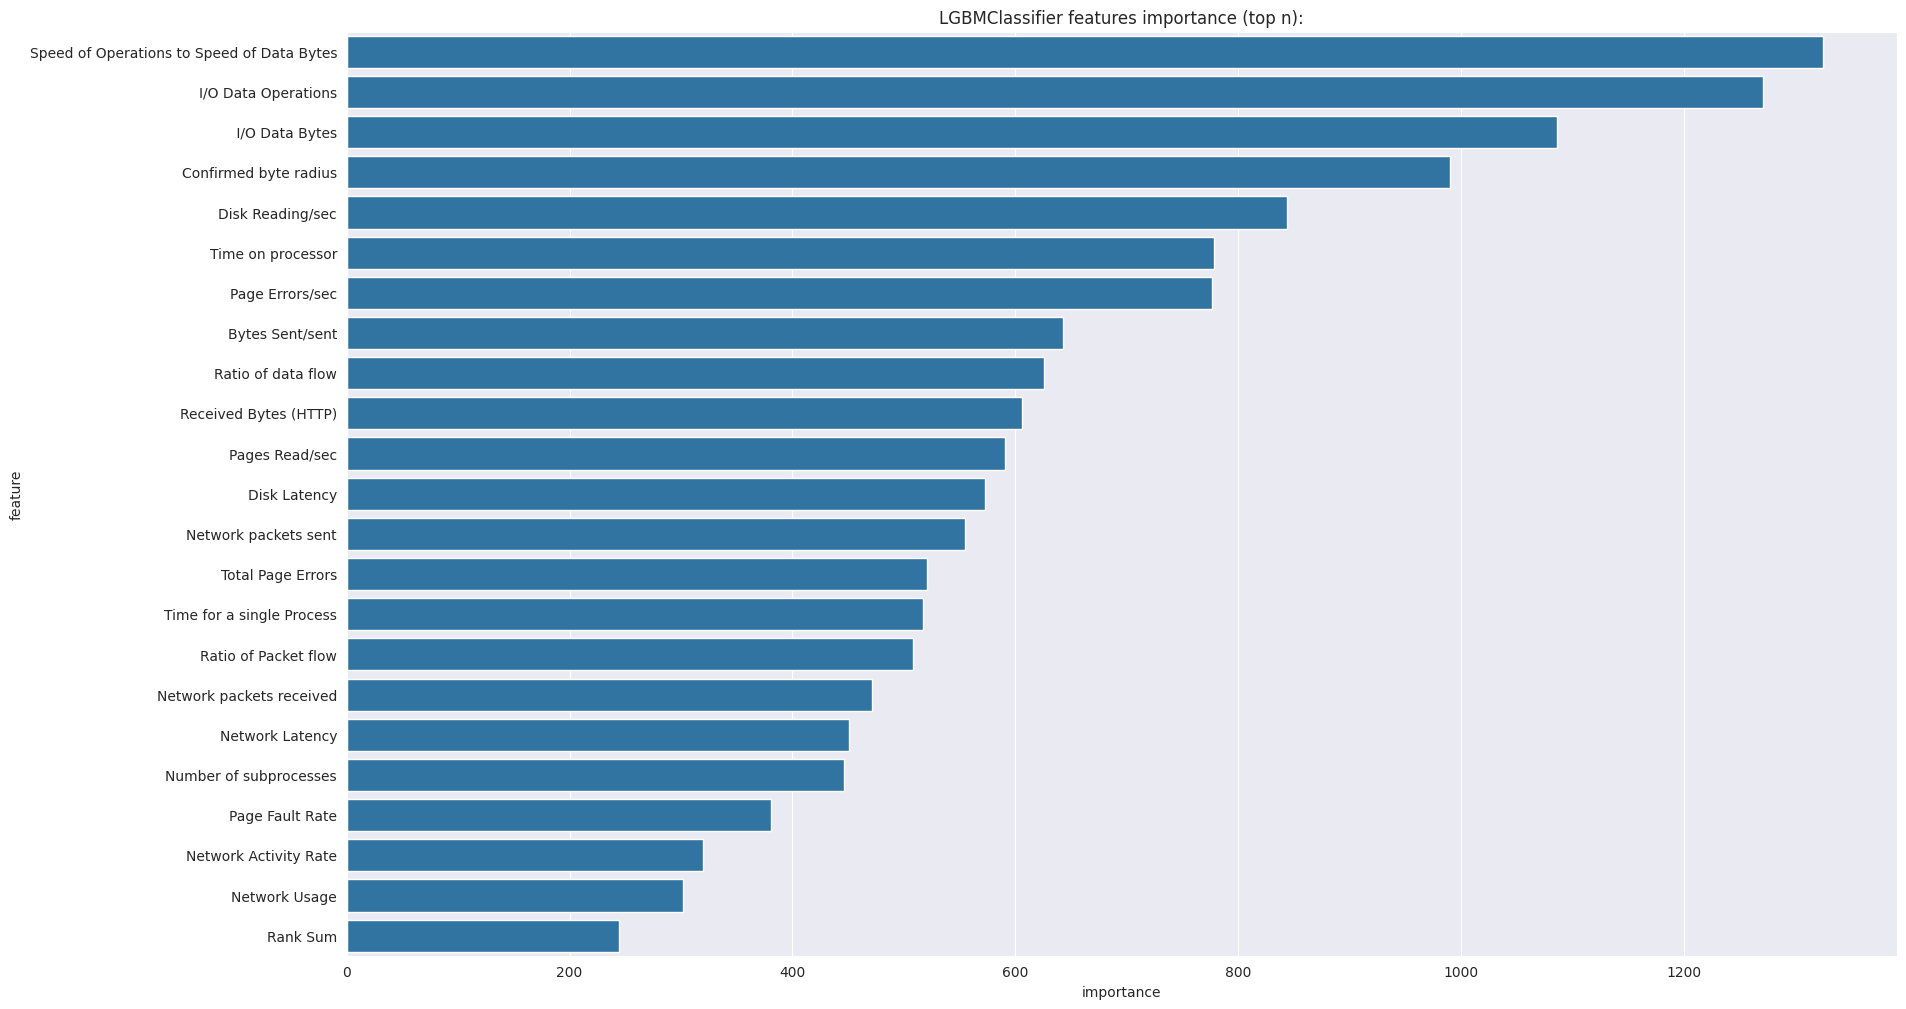

In [99]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMClassifier features importance (top n):');

In [100]:
sub = ss.copy()
sub.head()
predictions = pd.DataFrame(predictions)
predictions.T.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0


In [101]:
predictions = predictions.mode()
predictions = predictions.T
predictions

,0,1
0,0.0,NaN
1,0.0,NaN
2,1.0,NaN
3,1.0,NaN
4,0.0,NaN
...,...,...
3813,0.0,NaN
3814,0.0,NaN
3815,1.0,NaN
3816,0.0,NaN


In [102]:
sub["Target"] = predictions[0]
sub["ID"] = pd.read_csv("/content/drive/MyDrive/indabax-rwanda-2024-hacktathon20240614-2435-ccan8g/Test.csv").ID
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0.0
1,ID_KUTY5K1G5F,0.0
2,ID_H6PJWKU831,1.0
3,ID_DNQXNVTXHE,1.0
4,ID_8CRTF1BJOD,0.0


In [103]:
sub["Target"].value_counts()

Target
0.0    2824
1.0     994
Name: count, dtype: int64

In [71]:
name = "indaba_24_crypto.csv"
sub.to_csv(name, index=False)
from google.colab import files
files.download(name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
!pip freeze > requirements.txt
requirements ="requirements.txt"

In [109]:
from google.colab import files
files.download(requirements)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>